# Goals and Overview

# Project

## Initialization

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Reading Data

In [2]:
df_orders = pd.read_csv('./datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('./datasets/products.csv', sep=';')
df_aisles = pd.read_csv('./datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('./datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('./datasets/order_products.csv', sep=';')

### Orders

In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
df_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


__Missing Data__

In [5]:
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [6]:
df_orders[df_orders['order_number'] > 1].isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

__Duplicate Data__

In [7]:
df_orders['order_id'].duplicated().sum()

15

In [8]:
duplicated_orders = df_orders[df_orders.duplicated()]
duplicated_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


All the duplicate orders have 3 as 'order_dow' and 2 as 'order_hour_of_day'

In [9]:
df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [10]:
df_orders = df_orders.drop_duplicates(subset='order_id')

In [11]:
df_orders.duplicated().sum()

0

In [12]:
df_orders['order_id'].duplicated().sum()

0

### Products

In [13]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
df_products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [15]:
df_products.loc[:, 'product_name_lower'] = df_products['product_name'].str.lower()

__Missing Data__

In [16]:
df_products.isna().sum()

product_id               0
product_name          1258
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64

In [17]:
missing_product_names = df_products[df_products['product_name'].isna()]
missing_product_names.groupby('aisle_id').count()

,product_id,product_name,department_id,product_name_lower
aisle_id,,,,
100,1258,0,1258,0


In [18]:
missing_product_names.groupby('department_id').count()


,product_id,product_name,aisle_id,product_name_lower
department_id,,,,
21,1258,0,1258,0


In [19]:
print(df_aisles[df_aisles['aisle_id'] == 100])
print(df_departments[df_departments['department_id'] == 21])


    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


In [20]:
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
df_products['product_name_lower'] = df_products['product_name_lower'].fillna('Unknown')
df_products.isna().sum()

product_id            0
product_name          0
aisle_id              0
department_id         0
product_name_lower    0
dtype: int64

__Duplicate Data__

In [21]:
duplicated_products = df_products[df_products.duplicated()]
duplicated_products

,product_id,product_name,aisle_id,department_id,product_name_lower


In [22]:
dupe_product_ids = df_products[df_products['product_id'].duplicated()] 
dupe_product_ids

,product_id,product_name,aisle_id,department_id,product_name_lower


In [23]:
df_products.loc[:, 'product_name_lower'] = df_products['product_name'].str.lower()
dupe_product_names = df_products[df_products['product_name_lower'].duplicated()]
dupe_product_names

,product_id,product_name,aisle_id,department_id,product_name_lower
71,72,Unknown,100,21,unknown
109,110,Unknown,100,21,unknown
296,297,Unknown,100,21,unknown
416,417,Unknown,100,21,unknown
436,437,Unknown,100,21,unknown
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


In [24]:
dupe_product_names = dupe_product_names.dropna()
dupe_product_names

,product_id,product_name,aisle_id,department_id,product_name_lower
71,72,Unknown,100,21,unknown
109,110,Unknown,100,21,unknown
296,297,Unknown,100,21,unknown
416,417,Unknown,100,21,unknown
436,437,Unknown,100,21,unknown
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


### Aisles

In [25]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [26]:
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


__Missing Values__

In [27]:
df_aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

__Duplicate Values__

In [28]:
duplicated_aisles = df_aisles[df_aisles.duplicated()] #Assigned to a variable all rows that are duplicated
duplicated_aisles

,aisle_id,aisle


In [29]:
df_aisles.info()
df_aisles.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


0

### Departments

In [30]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [31]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


__Missing Values__

In [32]:
df_departments.isna().sum()

department_id    0
department       0
dtype: int64

__Duplicate Values__

In [33]:
duplicated_departments = df_departments[df_departments.duplicated()] #Assigned to a variable all departments that are duplicated
duplicated_departments

,department_id,department


In [34]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [35]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### Order Products

In [36]:
df_order_products.info()
df_order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [37]:
df_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


While 'departments' and 'aisles' are simple lists with 2 columns, the other dataframes are more complex with certain values repeating themselves.

In 'df_orders' the 'days_since_prior_order' column seems to be missing values.

In 'df_products' the 'product_name' column seems to be missing values.

In 'df_order_products' the 'add_to_cart_order' column could be changed to int64 datatype

'df_order_products' has the most values, followed by 'df_orders' which has about a 1/10 of the values.

__Missing Values__

In [38]:
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [39]:
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())

1.0
64.0


In [40]:
orders_missing_atco = df_order_products[df_order_products['add_to_cart_order'].isna()]
missing_val_orderid = orders_missing_atco['order_id'].unique()
missing_val_orderid

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171],
      dtype=int64)

In [41]:
def count_order_products(arr):
    x = 0
    y = 0
    for i in range(len(arr)):
        count = df_order_products[df_order_products['order_id'] == missing_val_orderid[i]]['order_id'].count()
        if count > 64:
            x = x + 1
        else:
            y = y + 1
    
    return f"{x} out of {len(arr)} ID's have more than 64 Products, {y} out of {len(arr)} ID's have less than 64 Products"
        
count_order_products(missing_val_orderid)

"70 out of 70 ID's have more than 64 Products, 0 out of 70 ID's have less than 64 Products"

In [42]:
#df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
print(df_order_products['add_to_cart_order'].isna().sum())
print()
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int', errors='ignore')
df_order_products.info()

836

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


__Duplicate Values__

In [43]:
dupe_order_products = df_order_products[df_order_products.duplicated()]
dupe_order_products

,order_id,product_id,add_to_cart_order,reordered


In [44]:
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [45]:
dupe_order_products = df_order_products[df_order_products.duplicated(subset=['order_id', 'product_id'])]
dupe_order_products.sort_values(by='order_id', ascending=True)

,order_id,product_id,add_to_cart_order,reordered


## EDA

In [46]:
sorted(df_orders['order_hour_of_day'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [47]:
sorted(df_orders['order_dow'].unique())

[0, 1, 2, 3, 4, 5, 6]

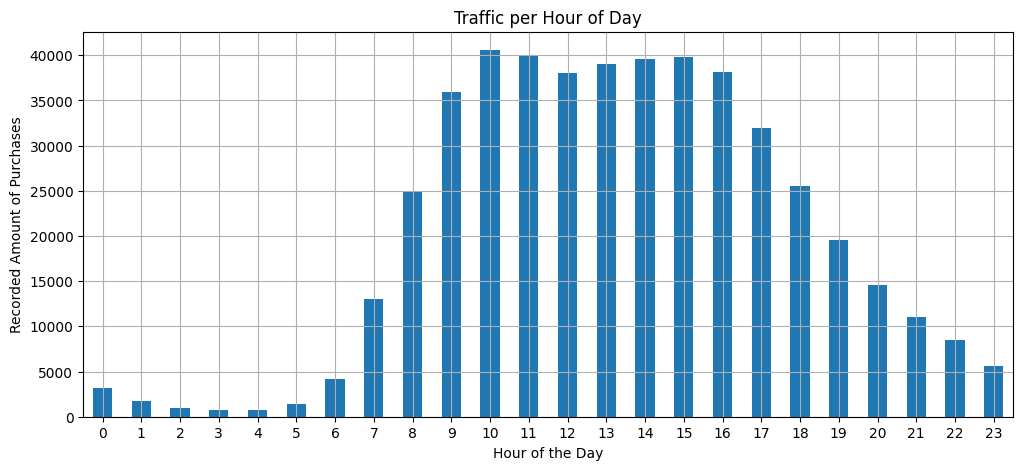

In [48]:
tod_order_count = df_orders.groupby('order_hour_of_day')['order_id'].count().reset_index()
tod_order_count.plot(
    title='Traffic per Hour of Day',
    figsize=[12, 5],
    xlim=[0, 23],
    x='order_hour_of_day',
    y='order_id',
    xlabel='Hour of the Day',
    ylabel='Recorded Amount of Purchases',
    kind='bar',
    rot=0,
    legend=False,
    grid=True
    )
plt.show()

#10AM has the most rows at 40578 indicating peak purchases

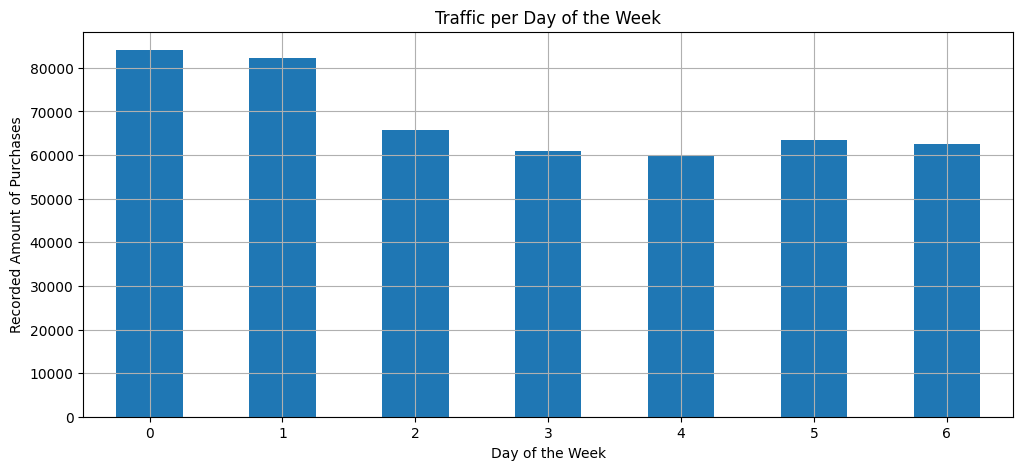

In [49]:
dow_order_count = df_orders.groupby('order_dow')['order_id'].count()

dow_order_count.plot(
    title='Traffic per Day of the Week',
    figsize=[12, 5],
    x='order_dow',
    y='order_id',
    xlabel='Day of the Week',
    ylabel='Recorded Amount of Purchases',
    kind='bar',
    rot=0,
    legend=False,
    grid=True
)
plt.show()

<Axes: xlabel='some', ylabel='Frequency'>

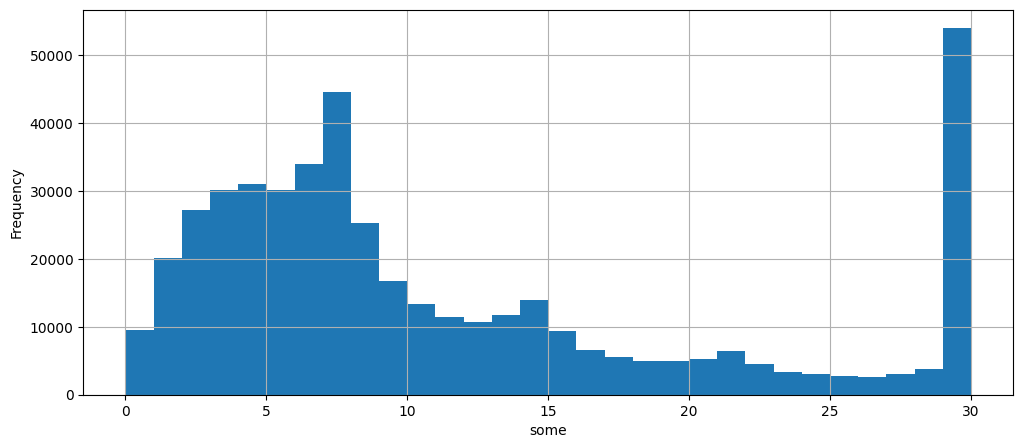

In [50]:
df_orders['days_since_prior_order'].plot(
    kind='hist',
    bins=30,
    grid=True,
    figsize=[12,5],
    xlabel='some'
)

#Very many people tend to wait 30 days before placing another order, but most people do so around a weekly basis. There is also a small but significant amount of people who place another on the same day

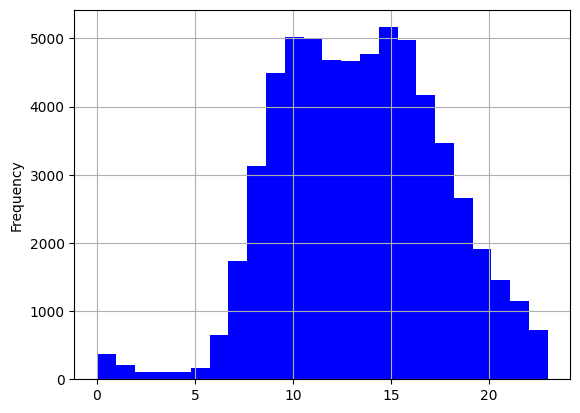

In [51]:
df_orders[df_orders['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=24, grid=True, color='blue')
plt.show()

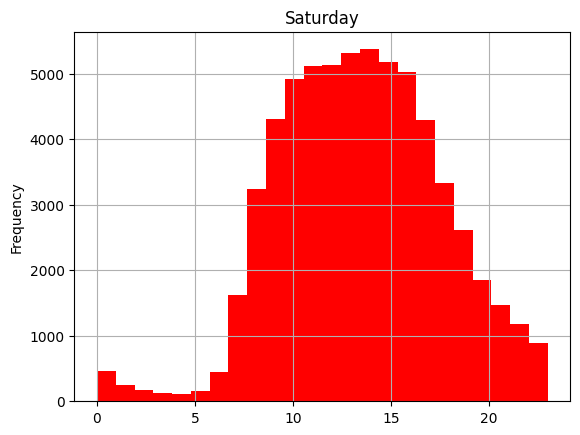

In [52]:
df_orders[df_orders['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins=24, grid=True, color='red', title='Saturday')
plt.show()

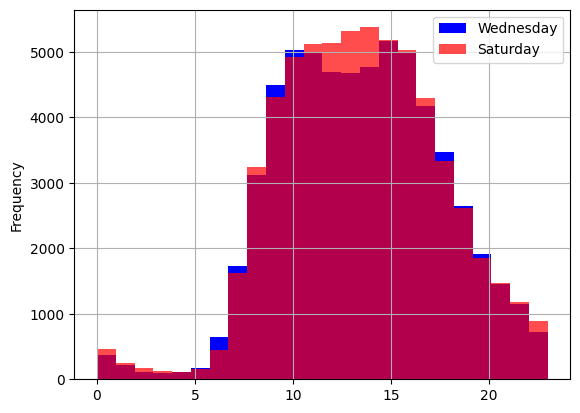

In [53]:
df_orders[df_orders['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=24, grid=True, color='blue')
df_orders[df_orders['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', alpha=0.7, bins=24, grid=True, color='red')
plt.legend(['Wednesday', 'Saturday'])
plt.show()

<Axes: ylabel='Frequency'>

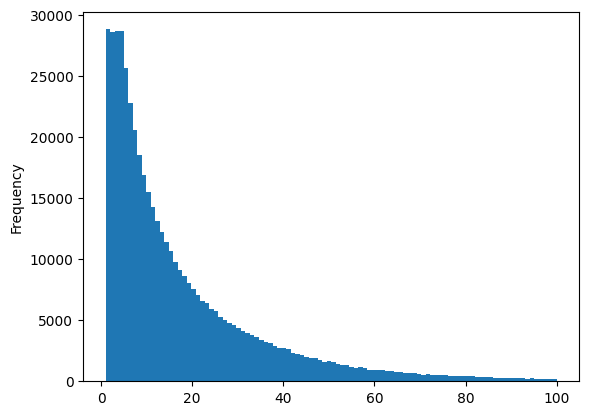

In [54]:
df_orders['order_number'].plot(kind='hist', bins=100)

In [55]:
top_20 = df_order_products.groupby('product_id').count().sort_values(by='order_id', ascending=False).head(20)
top_20

,order_id,add_to_cart_order,reordered
product_id,,,
24852,66050,66046,66050
13176,53297,53295,53297
21137,37039,37035,37039
21903,33971,33970,33971
47209,29773,29772,29773
47766,24689,24689,24689
47626,21495,21495,21495
16797,20018,20017,20018
26209,19690,19689,19690


In [56]:
#df_products[df_products['product_id'] == 21903]
top_20_names = top_20.merge(df_products, on='product_id')
col_drop = ['order_id', 'add_to_cart_order']
top_20_names = top_20_names.drop(columns=col_drop)
top_20_names = top_20_names.rename(
    columns={
        'reordered': '#_times_ordered'
    }
)
top_20_names

,product_id,#_times_ordered,product_name,aisle_id,department_id,product_name_lower
0,24852,66050,Banana,24,4,banana
1,13176,53297,Bag of Organic Bananas,24,4,bag of organic bananas
2,21137,37039,Organic Strawberries,24,4,organic strawberries
3,21903,33971,Organic Baby Spinach,123,4,organic baby spinach
4,47209,29773,Organic Hass Avocado,24,4,organic hass avocado
5,47766,24689,Organic Avocado,24,4,organic avocado
6,47626,21495,Large Lemon,24,4,large lemon
7,16797,20018,Strawberries,24,4,strawberries
8,26209,19690,Limes,24,4,limes
9,27845,19600,Organic Whole Milk,84,16,organic whole milk


<Axes: title={'center': 'Top 20 Products and # of Purchases'}, xlabel='Product Name', ylabel='Recorded Amount of Reorders'>

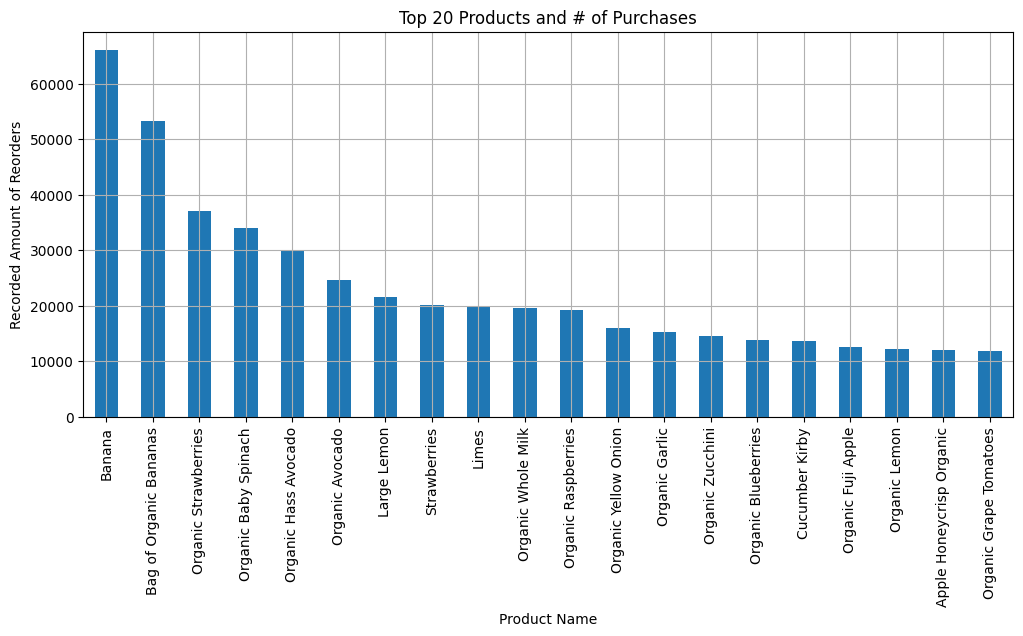

In [57]:
top_20_names.plot(
    title='Top 20 Products and # of Purchases',
    x='product_name',
    y='#_times_ordered',
    kind='bar',
    legend=False,
    grid=True,
    xlabel='Product Name',
    ylabel='Recorded Amount of Reorders',
    figsize=[12,5]
)


C:\Users\crisl\AppData\Local\Temp\ipykernel_24584\793575826.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


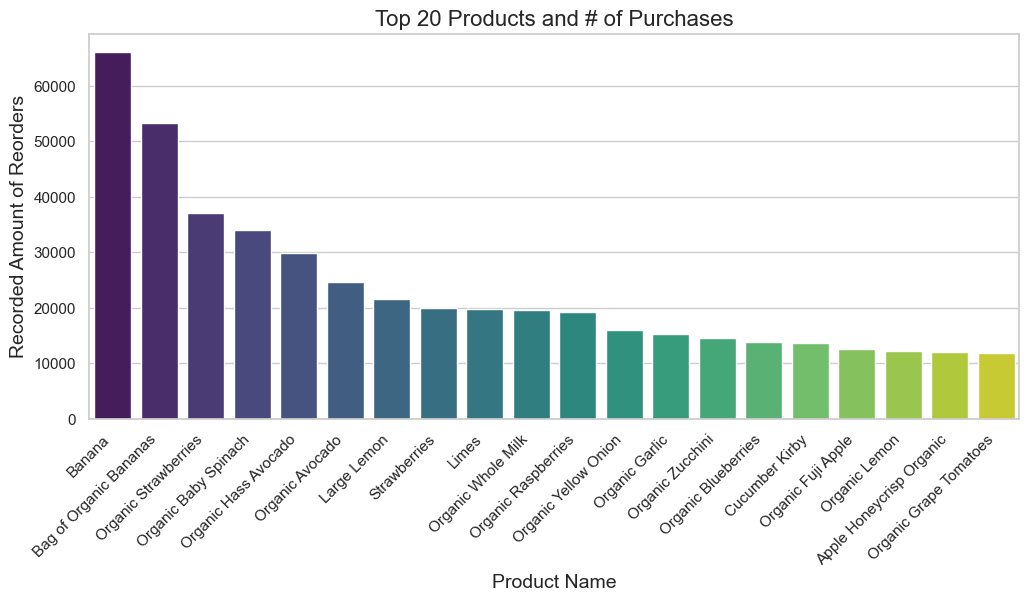

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 5))
sns.barplot(
    data=top_20_names,
    x='product_name',
    y='#_times_ordered',
    palette='viridis'
)

# Add titles and labels
plt.title('Top 20 Products and # of Purchases', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Recorded Amount of Reorders', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [59]:
reordered_p = df_order_products[df_order_products['reordered'] == 1]

top_20_reordered = reordered_p.groupby('product_id').count().sort_values(by='reordered', ascending=False).head(20)
top_20_reordered

,order_id,add_to_cart_order,reordered
product_id,,,
24852,55763,55761,55763
13176,44450,44448,44450
21137,28639,28637,28639
21903,26233,26232,26233
47209,23629,23628,23629
47766,18743,18743,18743
27845,16251,16251,16251
47626,15044,15044,15044
27966,14748,14747,14748


In [60]:
top_20_reordered = top_20_reordered.merge(df_products, on='product_id')
col_drop = ['order_id', 'add_to_cart_order']
top_20_reordered = top_20_reordered.drop(columns=col_drop)
top_20_reordered = top_20_reordered.rename(
    columns={
        'reordered': '#_times_reordered'
    }
)
top_20_reordered

,product_id,#_times_reordered,product_name,aisle_id,department_id,product_name_lower
0,24852,55763,Banana,24,4,banana
1,13176,44450,Bag of Organic Bananas,24,4,bag of organic bananas
2,21137,28639,Organic Strawberries,24,4,organic strawberries
3,21903,26233,Organic Baby Spinach,123,4,organic baby spinach
4,47209,23629,Organic Hass Avocado,24,4,organic hass avocado
5,47766,18743,Organic Avocado,24,4,organic avocado
6,27845,16251,Organic Whole Milk,84,16,organic whole milk
7,47626,15044,Large Lemon,24,4,large lemon
8,27966,14748,Organic Raspberries,123,4,organic raspberries
9,16797,13945,Strawberries,24,4,strawberries


<Axes: title={'center': 'Top 20 Reordered Products and # of Reorders'}, xlabel='Product Name', ylabel='Recorded Amount of Reorders'>

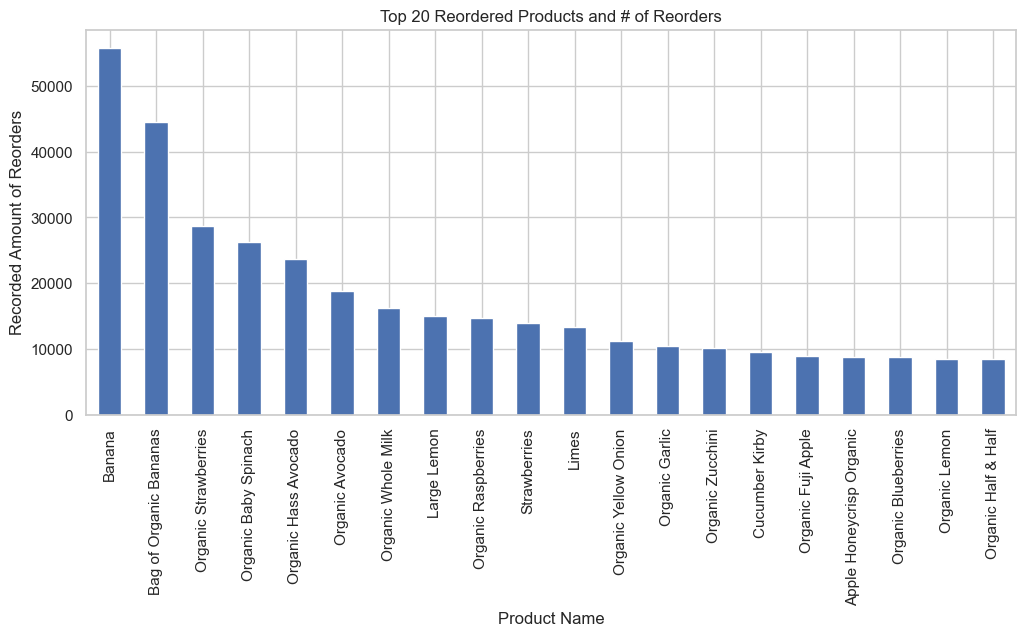

In [61]:
top_20_reordered.plot(
    title='Top 20 Reordered Products and # of Reorders',
    x='product_name',
    y='#_times_reordered',
    kind='bar',
    legend=False,
    grid=True,
        xlabel='Product Name',
    ylabel='Recorded Amount of Reorders',
    figsize=[12,5])

In [62]:
product_qty = df_order_products.groupby('product_id')['order_id'].count()
product_reordered = df_order_products.groupby('product_id')['reordered'].sum()

df_products = pd.merge(df_products, product_qty, on='product_id', how='left')
df_products = pd.merge(df_products, product_reordered, on='product_id', how='left')

df_products = df_products.rename(
    columns={
        'order_id': '#_orders',
        'reordered': '#_reorders'
    }
)

df_products['%_reorders'] = df_products['#_reorders'] / df_products['#_orders']

df_products

,product_id,product_name,aisle_id,department_id,product_name_lower,#_orders,#_reorders,%_reorders
0,1,Chocolate Sandwich Cookies,61,19,chocolate sandwich cookies,280.0,158.0,0.564286
1,2,All-Seasons Salt,104,13,all-seasons salt,11.0,0.0,0.000000
2,3,Robust Golden Unsweetened Oolong Tea,94,7,robust golden unsweetened oolong tea,42.0,31.0,0.738095
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,smart ones classic favorites mini rigatoni wit...,49.0,25.0,0.510204
4,5,Green Chile Anytime Sauce,5,13,green chile anytime sauce,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink,5.0,4.0,0.800000
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix,72.0,31.0,0.430556
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar,12.0,5.0,0.416667
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash,25.0,11.0,0.440000


In [63]:
list_with_ids = pd.merge(df_order_products, df_orders, on='order_id', how='left')
keep = ['order_id', 'product_id', 'user_id', 'reordered']
list_with_ids = list_with_ids[keep]
list_with_ids

,order_id,product_id,user_id,reordered
0,2141543,11440,58454,0
1,567889,1560,129474,1
2,2261212,26683,47476,1
3,491251,8670,134505,1
4,2571142,1940,155995,1
...,...,...,...,...
4545002,577211,15290,76414,1
4545003,1219554,21914,163902,0
4545004,692640,47766,597,1
4545005,319435,691,7124,1


In [64]:
user_purchases = list_with_ids.groupby('user_id')['order_id'].count()
user_purchases = user_purchases.rename('product_purchases')

user_reorders = list_with_ids.groupby('user_id')['reordered'].sum()
user_reorders = user_reorders.rename('products_reordered')

user_id_list = pd.Series(list_with_ids['user_id'].unique())
user_id_list = user_id_list.rename('user_id')
user_id_list = pd.merge(user_id_list, user_purchases, on='user_id', how='left')
user_id_list = pd.merge(user_id_list, user_reorders, on='user_id', how='left')
user_id_list['reordered_ratio'] = user_id_list['products_reordered'] / user_id_list['product_purchases']
user_id_list

,user_id,product_purchases,products_reordered,reordered_ratio
0,58454,84,63,0.750000
1,129474,140,108,0.771429
2,47476,28,17,0.607143
3,134505,206,169,0.820388
4,155995,29,21,0.724138
...,...,...,...,...
149621,70529,1,1,1.000000
149622,53097,1,0,0.000000
149623,5899,1,0,0.000000
149624,101839,1,0,0.000000


## Conclusion